## Yelp open dataset

#### This a simple EDA case study regarding the Yelp Open Dataset.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
business_df = pd.read_json('business.json', lines=True)

In [48]:
business_df.head(50)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,FL,33707,27.766590,-82.732983,3.5,5,1,None,"Synagogues, Religious Organizations","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."


### Business Data sanity check

In [49]:
business_df.shape

(150346, 14)

This dataframe has 14 columns and 150346 entries/rows

In [50]:
business_df.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object

In [51]:
business_df.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

The "attributes","categories" and "hours" has missing or null values.

In [52]:
business_df.dropna(thresh=3, inplace=True)

This line removes any row with more than 3 null values

## Is the star rating a decisive rating for a business?

### Distribution of star rating against the number of businesses
To answer the question we need to understand the shape and statics of the star rating system

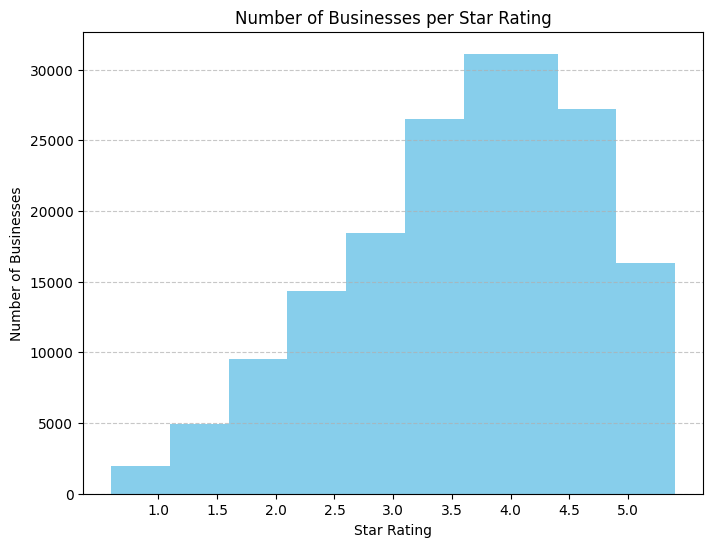

In [53]:
restaurants_per_star = business_df.groupby('stars').size()

plt.figure(figsize=(8, 6))
plt.bar(restaurants_per_star.index, restaurants_per_star.values, color='skyblue')
plt.xlabel('Star Rating')
plt.ylabel('Number of Businesses')
plt.title('Number of Businesses per Star Rating')
plt.xticks(restaurants_per_star.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Is the star rating dependent on the city of the business?

This is to decide if the star rating is linked to the city of the business.This is done by finding the cities with the highest star ratings

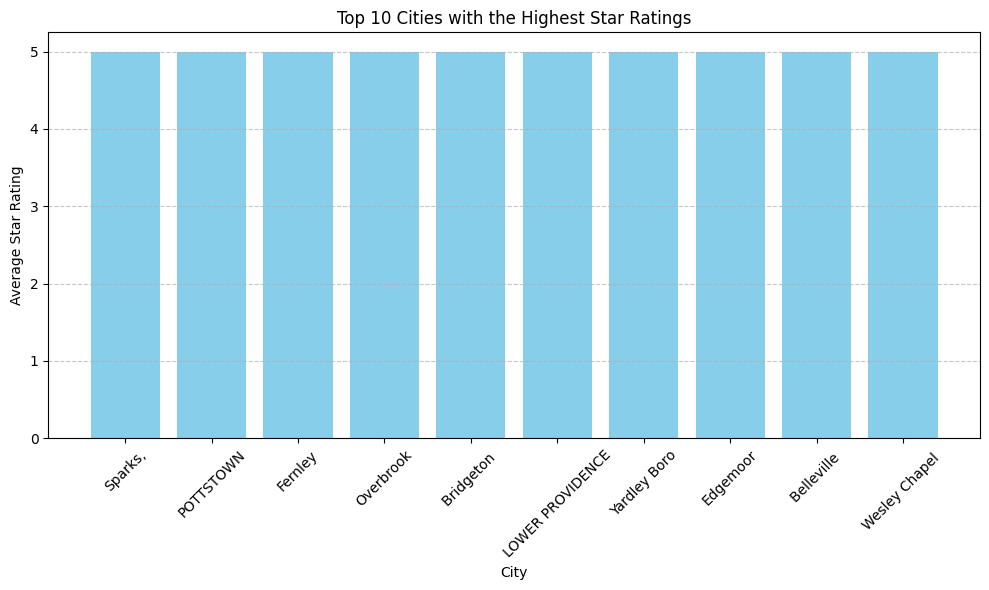

In [54]:
avg_stars_by_city = business_df.groupby('city')['stars'].mean().reset_index()
top_10_cities = avg_stars_by_city.sort_values(by='stars', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_cities['city'], top_10_cities['stars'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Average Star Rating')
plt.title('Top 10 Cities with the Highest Star Ratings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

There is a clear bias in the result since we did not take the number of business in the city into consideration.Wich lead to this extreme result.
To get a clearer more accurate result we can do the same but with cities that have 50+ businesses

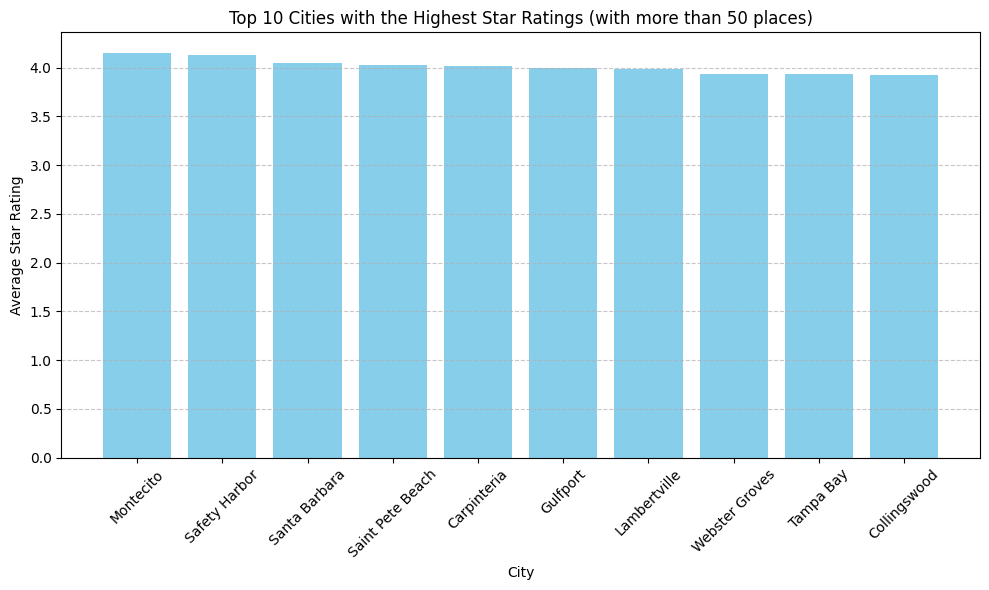

In [55]:
places_per_city = business_df['city'].value_counts()

cities_with_more_than_50_places = places_per_city[places_per_city > 50].index
yelp_data_filtered = business_df[business_df['city'].isin(cities_with_more_than_50_places)]

avg_stars_by_city = yelp_data_filtered.groupby('city')['stars'].mean().reset_index()

top_10_cities = avg_stars_by_city.sort_values(by='stars', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_cities['city'], top_10_cities['stars'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Average Star Rating')
plt.title('Top 10 Cities with the Highest Star Ratings (with more than 50 places)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The result makes more since there the max average rating for a city is approximately 4.0 stars.
From this we can see that some cities have higher quality businesses wich reflects that star rating doesn't only indicate the quality of a business but the quality of the city that it is in.

### Now is the star rating affected by the reviews count?

This question is to determine if the star rating does reflect the opinion of the people.A business may have a good or a bad rating ut is it really necessary mean that it reflect the opinion of the majority?

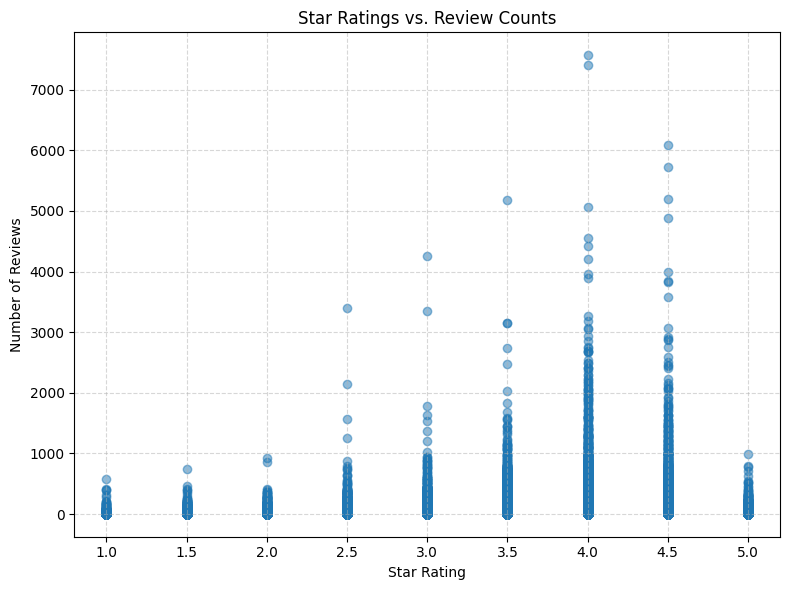

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(business_df['stars'], business_df['review_count'], alpha=0.5)
plt.title('Star Ratings vs. Review Counts')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

From there figure above it is clear that the star rating for a business is backed with at least 500+ reviews.This indicates that star ratings does somehow reflect the opinion of the people.

So Star rating is a good measure for the quality of a business.

### What are the most common categories on Yelp?

#### Top 10 most common categorise

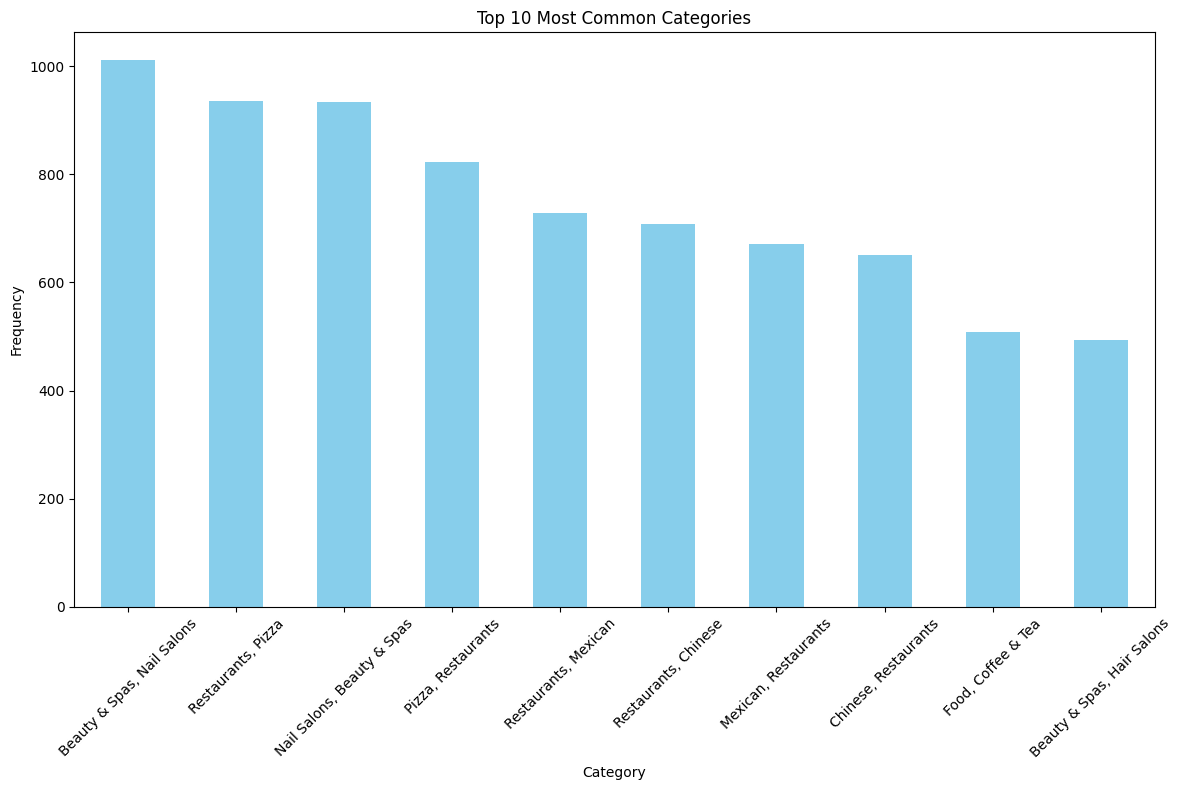

In [57]:
business_df.dropna(subset=['categories'], inplace=True)
business_df['categories_list'] = business_df['categories'].str.split(';')

category_counts = business_df['categories_list'].explode().value_counts()
top_10_categories = category_counts.head(10)

plt.figure(figsize=(12, 8))
top_10_categories.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


It is clear there is duplicates in the categories due to some categories being the same but wiht rearranged word order.I tried to solve it but most solutions take too long time that the Jupyter server times out

#### Most common categories in the top 10 cities with the biggest number rof businesses

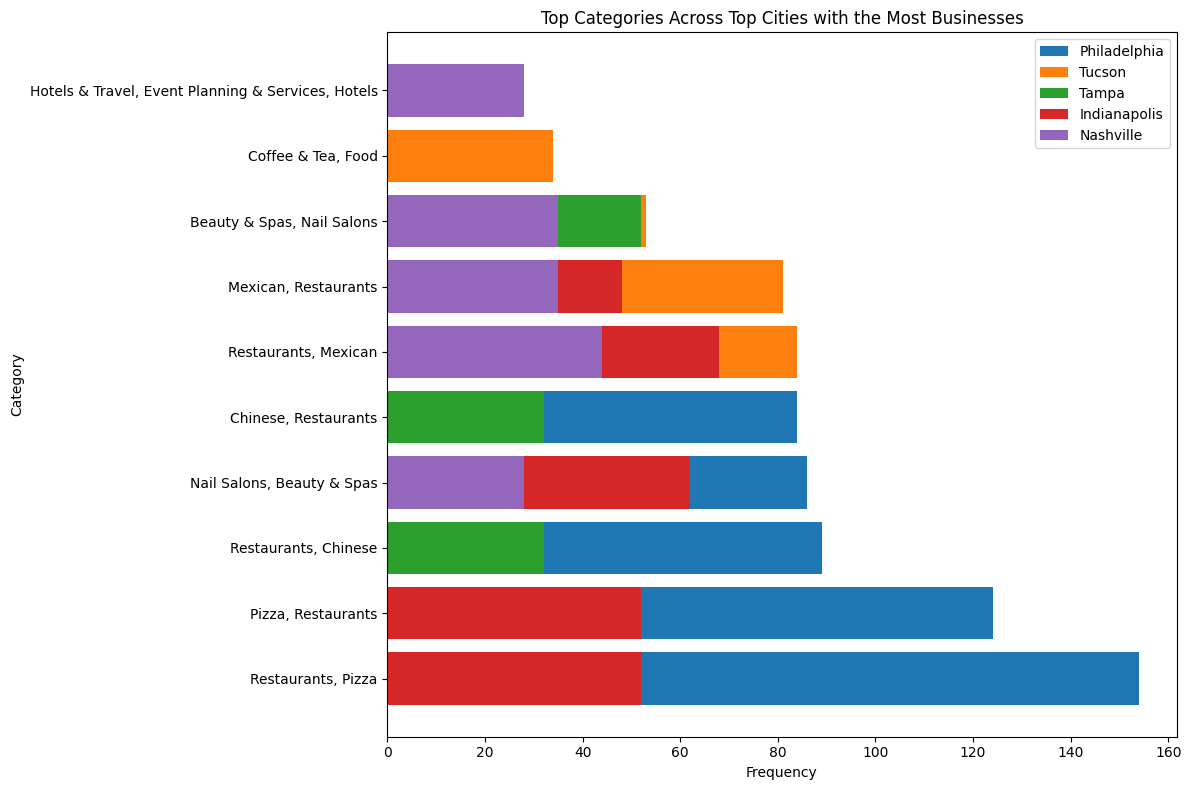

In [58]:
city_business_counts = business_df['city'].value_counts()

top_cities = city_business_counts.head(5).index.tolist()

plt.figure(figsize=(12, 8))
for city in top_cities:
    city_data = business_df[business_df['city'] == city]

    category_counts = city_data['categories_list'].explode().value_counts()

    top_categories = category_counts.head(5)

    plt.barh(top_categories.index, top_categories.values, label=city)

plt.xlabel('Frequency')
plt.ylabel('Category')
plt.title('Top Categories Across Top Cities with the Most Businesses')
plt.legend()
plt.tight_layout()
plt.show()

The same duplication problem occurs.This due the categories column being a dictionary (un-hashable type) wich forced me to parse it as a list of strings which caused the original problem.

### How do star ratings and review counts vary across different days of the week?

To understand how does ratings volume relate to the days of the week.We can plot the average review count per review for each day of the week .The best way to visualize it is to use a radar chart.iN other words we need to plot the star rating average and ratings count for each day.

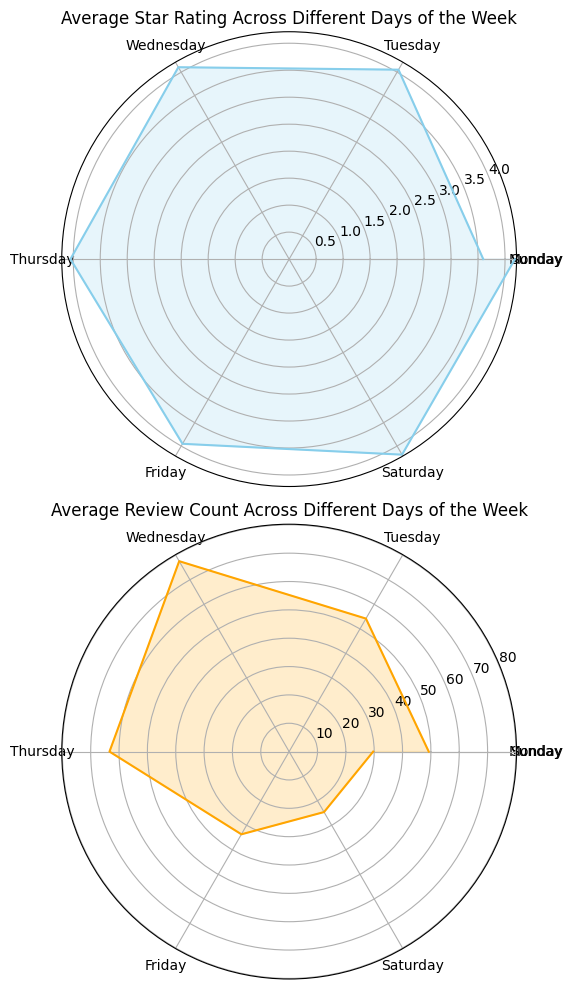

In [59]:
business_df['day_open'] = business_df['hours'].apply(lambda x: list(x.keys())[0] if x else None)

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
business_df['day_open'] = pd.Categorical(business_df['day_open'], categories=days_order, ordered=True)

average_star_rating = business_df.groupby('day_open',observed=True)['stars'].mean()
average_review_count = business_df.groupby('day_open',observed=True)['review_count'].mean()

plt.figure(figsize=(10, 10))

ax1 = plt.subplot(2, 1, 1, polar=True)
theta = np.linspace(0, 2 * np.pi, len(average_star_rating))
ax1.plot(theta, average_star_rating.values, color='skyblue')
ax1.fill(theta, average_star_rating.values, color='skyblue', alpha=0.2)
ax1.set_xticks(theta)
ax1.set_xticklabels(average_star_rating.index)
ax1.set_title('Average Star Rating Across Different Days of the Week')

ax2 = plt.subplot(2, 1, 2, polar=True)
theta = np.linspace(0, 2 * np.pi, len(average_review_count))
ax2.plot(theta, average_review_count.values, color='orange')
ax2.fill(theta, average_review_count.values, color='orange', alpha=0.2)
ax2.set_xticks(theta)
ax2.set_xticklabels(average_review_count.index)
ax2.set_title('Average Review Count Across Different Days of the Week')

plt.tight_layout()
plt.show()

It is clear that star rating value doesn't depend on a specific day.Although MMondays had the lowest rating .Maybe due to the fact that it is the first day in the working week in the USA so most people won't be in the mood  to give a good rating.On the other hand Wednesdays and Thursdays had the highest reviews count.